<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install "dask[complete]"

     |████████████████████████████████| 112kB 5.6MB/s 
     |████████████████████████████████| 675kB 9.1MB/s 
ERROR: distributed 2021.3.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.3.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
import dask
import dask.array as da
import dask.dataframe as dd
import dask.delayed as delayed
import numpy as np
import pandas as pd
import datetime as dt

In [ ]:
%pip install dask distributed --upgrade

     |████████████████████████████████| 931kB 5.2MB/s 
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.3.0)
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0


In [ ]:
client = Client()

In [17]:
client

NameError: ignored

In [ ]:
def inc(num):
    return num + 1

In [ ]:
def add(a, b):
    return a + b

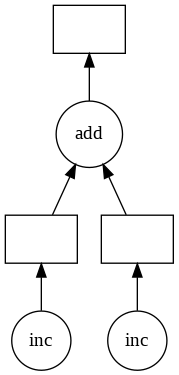

In [ ]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)
z.visualize()

In [ ]:
x=da.random.random ((10000,10000))
z=x[::2,5000:].mean (axis=1)
%time z.compute()

CPU times: user 783 ms, sys: 39.5 ms, total: 823 ms
Wall time: 422 ms


array([0.49346372, 0.49817343, 0.50125265, ..., 0.50831316, 0.50651459,
       0.49655882])

CPU times: user 784 ms, sys: 2.83 ms, total: 787 ms
Wall time: 403 ms


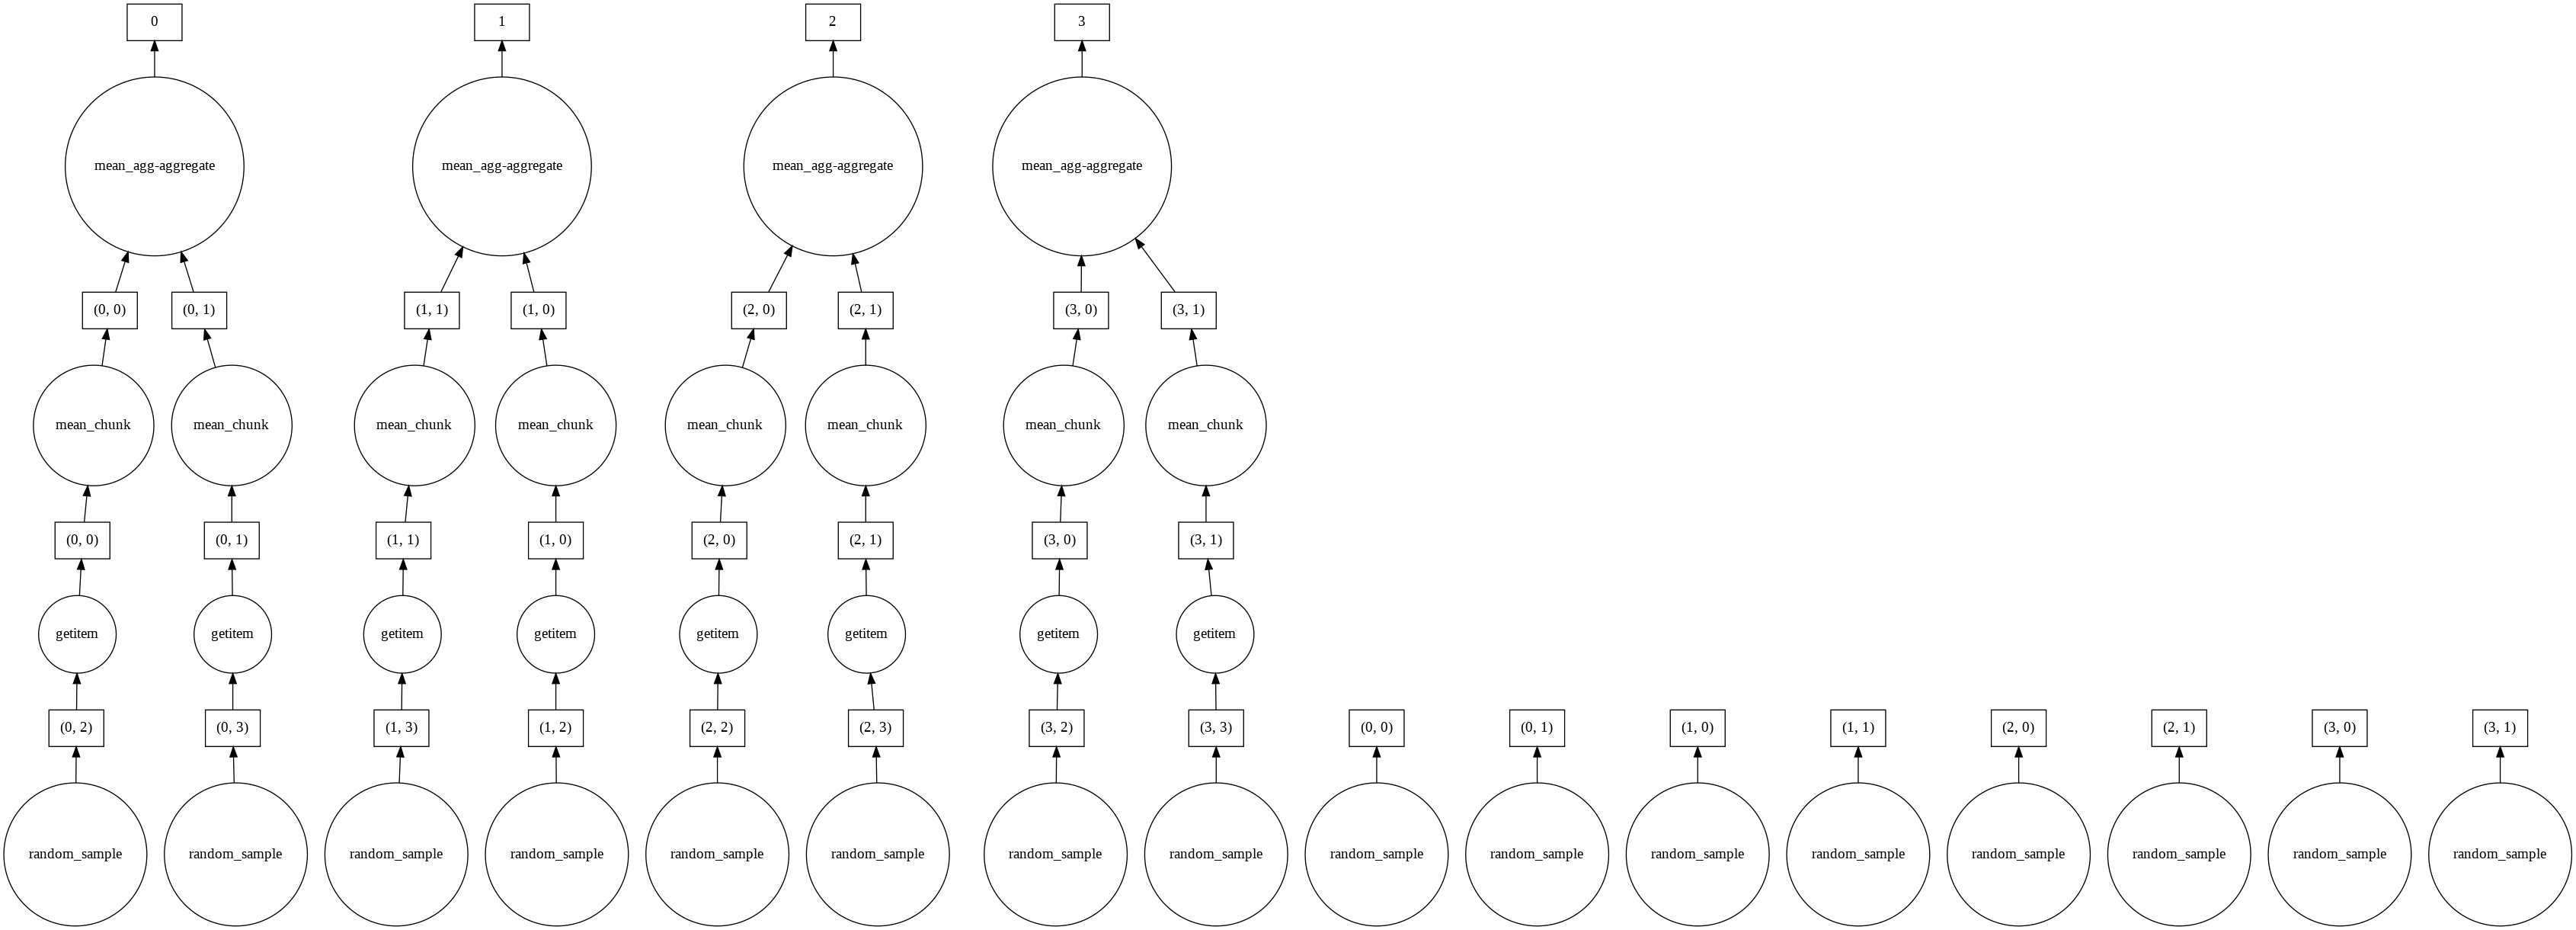

In [ ]:
 x=da.random.random((10000, 10000))
z=x[::2, 5000:].mean(axis=1)
%time z.compute()
z.visualize()

In [ ]:
sch=['multiprocessing', 'processes', 'single-threaded', 'sync', 'synchronous', 'threading', 'threads']

In [ ]:
for i in sch:
    print(i,':')
    %time z.compute(scheduler=i)

multiprocessing :
CPU times: user 15.7 ms, sys: 12.5 ms, total: 28.3 ms
Wall time: 39.8 ms
processes :
CPU times: user 9.9 ms, sys: 16 ms, total: 25.9 ms
Wall time: 31 ms
single-threaded :
CPU times: user 0 ns, sys: 819 µs, total: 819 µs
Wall time: 840 µs
sync :
CPU times: user 446 µs, sys: 47 µs, total: 493 µs
Wall time: 492 µs
synchronous :
CPU times: user 389 µs, sys: 14 µs, total: 403 µs
Wall time: 401 µs
threading :
CPU times: user 4.18 ms, sys: 136 µs, total: 4.32 ms
Wall time: 3.59 ms
threads :
CPU times: user 2.24 ms, sys: 40 µs, total: 2.28 ms
Wall time: 2.05 ms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6R5u9jXPVGnwhzl94C3TNMDrqaHFFrRua51yTT-RXKci7JhXXhNBI
Mounted at /content/drive


In [ ]:
emp = pd.read_csv('drive/MyDrive/employees.csv')
print(emp)
sal = pd.read_csv('drive/MyDrive/salaries.csv')
print(sal)
#se combină tablourile employees și salaries prin câmpul emp_no, se creează un nou dataframe
empm=emp.join(sal.set_index('emp_no'),on='emp_no',how='inner')
print(empm)

      emp_no  birth_date first_name   last_name gender   hire_date   dep
0      10001    9/2/1953     Georgi     Facello      M   6/26/1986  d005
1      10002    6/2/1964    Bezalel      Simmel      F  11/21/1985  d007
2      10003   12/3/1959      Parto     Bamford      M   8/28/1986  d004
3      10004    5/1/1954  Chirstian     Koblick      M   12/1/1986  d004
4      10005   1/21/1955    Kyoichi    Maliniak      M   9/12/1989  d003
...      ...         ...        ...         ...    ...         ...   ...
9995   19996    3/7/1954      Berni      Chinen      M   8/17/1985  d004
9996   19997   12/6/1957     Otilia     Zumaque      M   2/28/1986  d008
9997   19998   7/31/1959     Fuqing  Maksimenko      M    5/2/1990  d003
9998   19999  10/16/1953   Jahangir       Speer      F   9/29/1989  d005
9999   20000   9/14/1961     Jenwei      Matzke      F  11/29/1990  d004

[10000 rows x 7 columns]
        emp_no  salary  from_date    to_date
0        10001   60117  6/26/1986  6/26/1987
1       

In [ ]:
empm['to_date']=empm['to_date'].astype('string')
empm=empm.drop(empm[empm['to_date'].str.contains('9999')].index)
print('Date gresite sterse',empm)
empm['from_date']=pd.to_datetime(empm['from_date'],yearfirst = True)
empm['to_date']=pd.to_datetime(empm['to_date'],yearfirst = True)
empm['birth_date']=pd.to_datetime(empm['birth_date'],yearfirst = True)

Date gresite sterse       emp_no birth_date first_name  ...  from_date     to_date   zile
7      10008 1958-02-19     Saniya  ... 1998-03-11  1999-03-11  365.0
7      10008 1958-02-19     Saniya  ... 1999-03-11  2000-03-10  365.0
7      10008 1958-02-19     Saniya  ... 2000-03-10  2000-07-31  143.0
10     10011 1953-11-07       Mary  ... 1990-01-22  1991-01-22  365.0
10     10011 1953-11-07       Mary  ... 1991-01-22  1992-01-22  365.0
...      ...        ...        ...  ...        ...         ...    ...
9993   19994 1963-05-09  Alejandra  ... 1997-11-01  1997-12-12   41.0
9994   19995 1962-12-31      Ziyad  ... 1996-07-12  1997-07-12  365.0
9994   19995 1962-12-31      Ziyad  ... 1997-07-12  1998-07-12  365.0
9994   19995 1962-12-31      Ziyad  ... 1998-07-12  1999-07-12  365.0
9994   19995 1962-12-31      Ziyad  ... 1999-07-12  2000-05-24  317.0

[12082 rows x 11 columns]


In [ ]:
#Afișarea numărul angajaților pe departamente în funcție de gen
pivot=pd.DataFrame()
pivot['gender']=empm['gender']
pivot['dep']=empm['dep']
pivot['first_name']=empm['first_name']
pivot=pivot.pivot_table(pivot,index=['gender','dep'],aggfunc='count')
print(pivot)

             first_name
gender dep             
F      d001         316
       d002         336
       d003         151
       d004        1484
       d005        1233
       d006         239
       d007         683
       d008         228
       d009         255
M      d001         358
       d002         446
       d003         336
       d004        1703
       d005        2061
       d006         290
       d007        1289
       d008         324
       d009         350


In [ ]:
#Importarea datelor in dask dataframe folosind 10 partitii
demp=dd.from_pandas(empm,npartitions=10)
print(demp)
demp.dtypes

Dask DataFrame Structure:
               emp_no birth_date first_name last_name  gender hire_date     dep salary from_date to_date
npartitions=10                                                                                          
0               int64     object     object    object  object    object  object  int64    object  object
1111              ...        ...        ...       ...     ...       ...     ...    ...       ...     ...
...               ...        ...        ...       ...     ...       ...     ...    ...       ...     ...
8829              ...        ...        ...       ...     ...       ...     ...    ...       ...     ...
9999              ...        ...        ...       ...     ...       ...     ...    ...       ...     ...
Dask Name: from_pandas, 10 tasks


emp_no         int64
birth_date    object
first_name    object
last_name     object
gender        object
hire_date     object
dep           object
salary         int64
from_date     object
to_date       object
dtype: object

In [19]:
#Structura de date
demp.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date,dep,salary,from_date,to_date
7,10008,1958-02-19,Saniya,Kalloufi,M,9/15/1994,d005,46671,1998-03-11,1999-03-11
7,10008,1958-02-19,Saniya,Kalloufi,M,9/15/1994,d005,48584,1999-03-11,2000-03-10
7,10008,1958-02-19,Saniya,Kalloufi,M,9/15/1994,d005,52668,2000-03-10,2000-07-31
10,10011,1953-11-07,Mary,Sluis,F,1/22/1990,d009,42365,1990-01-22,1991-01-22
10,10011,1953-11-07,Mary,Sluis,F,1/22/1990,d009,44200,1991-01-22,1992-01-22


In [20]:
#Partitiile
demp.npartitions
demp.map_partitions(len).compute()

0    1210
1    1209
2    1210
3    1209
4    1207
5    1210
6    1210
7    1218
8    1199
9    1200
dtype: int64

In [47]:
demp=demp.persist()

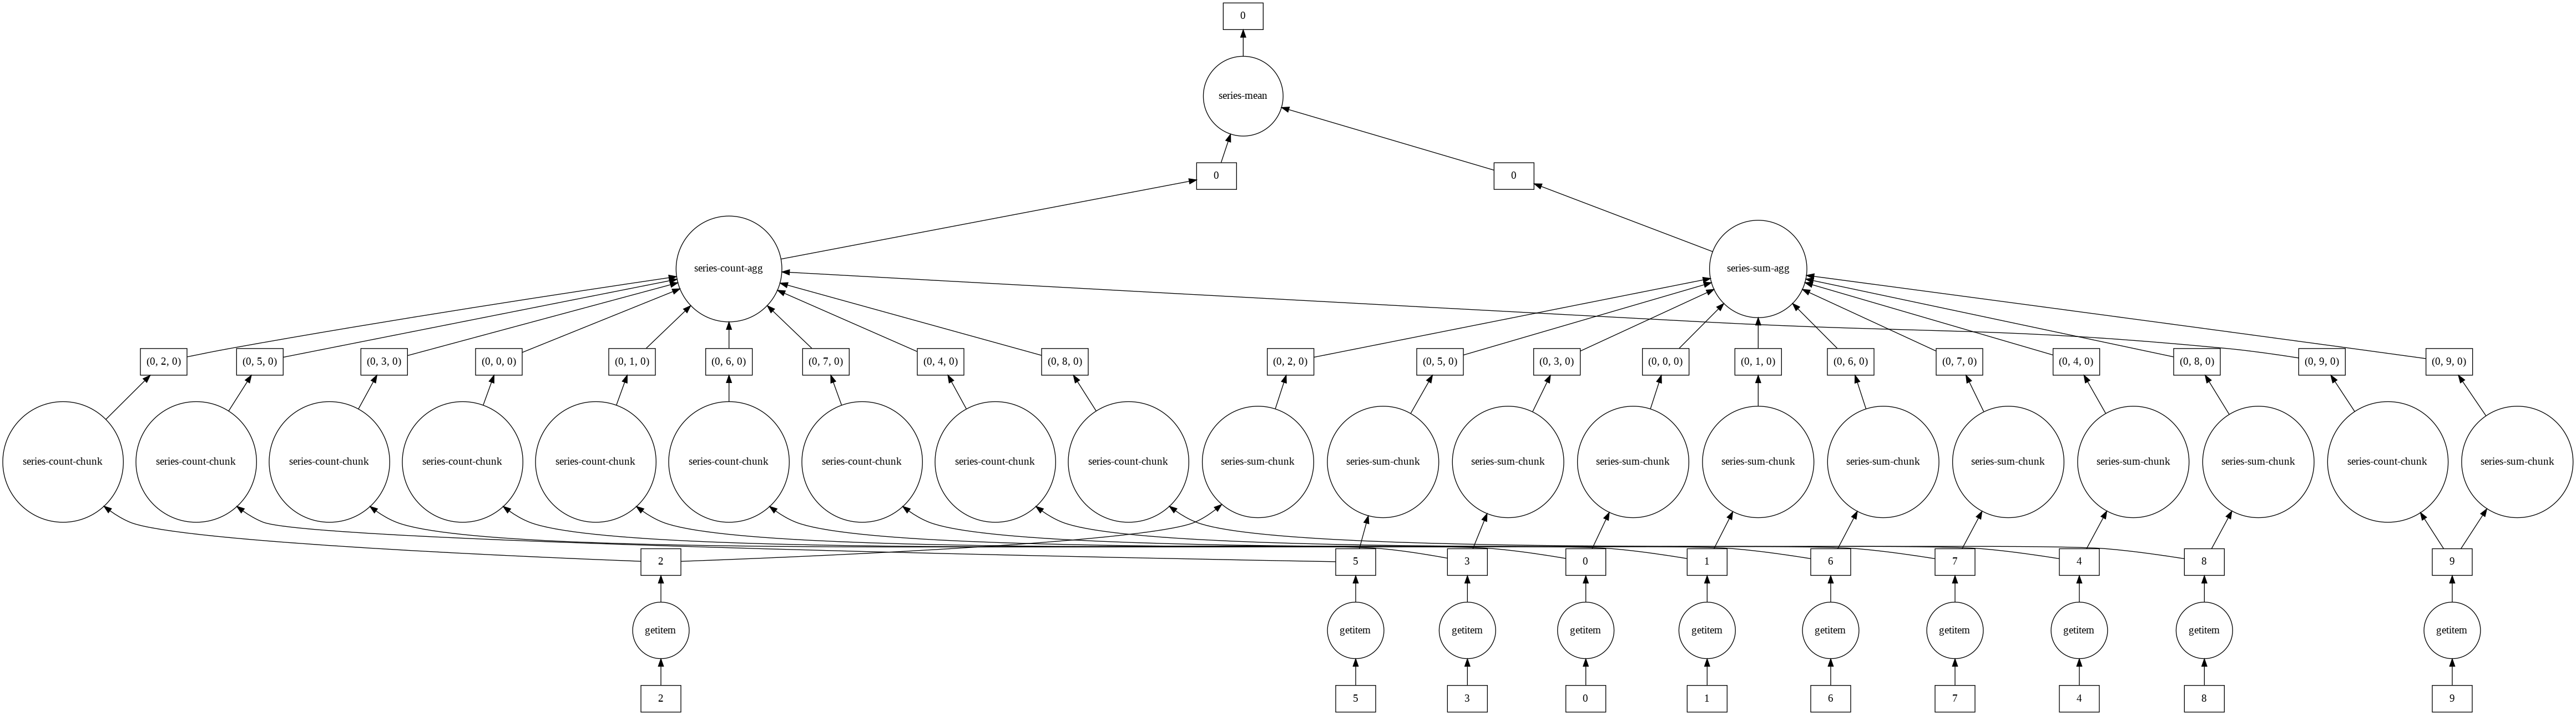

In [ ]:
#Sa se afiseze salariul mediu
ds=demp.salary.mean()
ds.visualize()

In [ ]:
%time ds.compute()

CPU times: user 20.8 ms, sys: 720 µs, total: 21.5 ms
Wall time: 24.5 ms


64070.50475811052

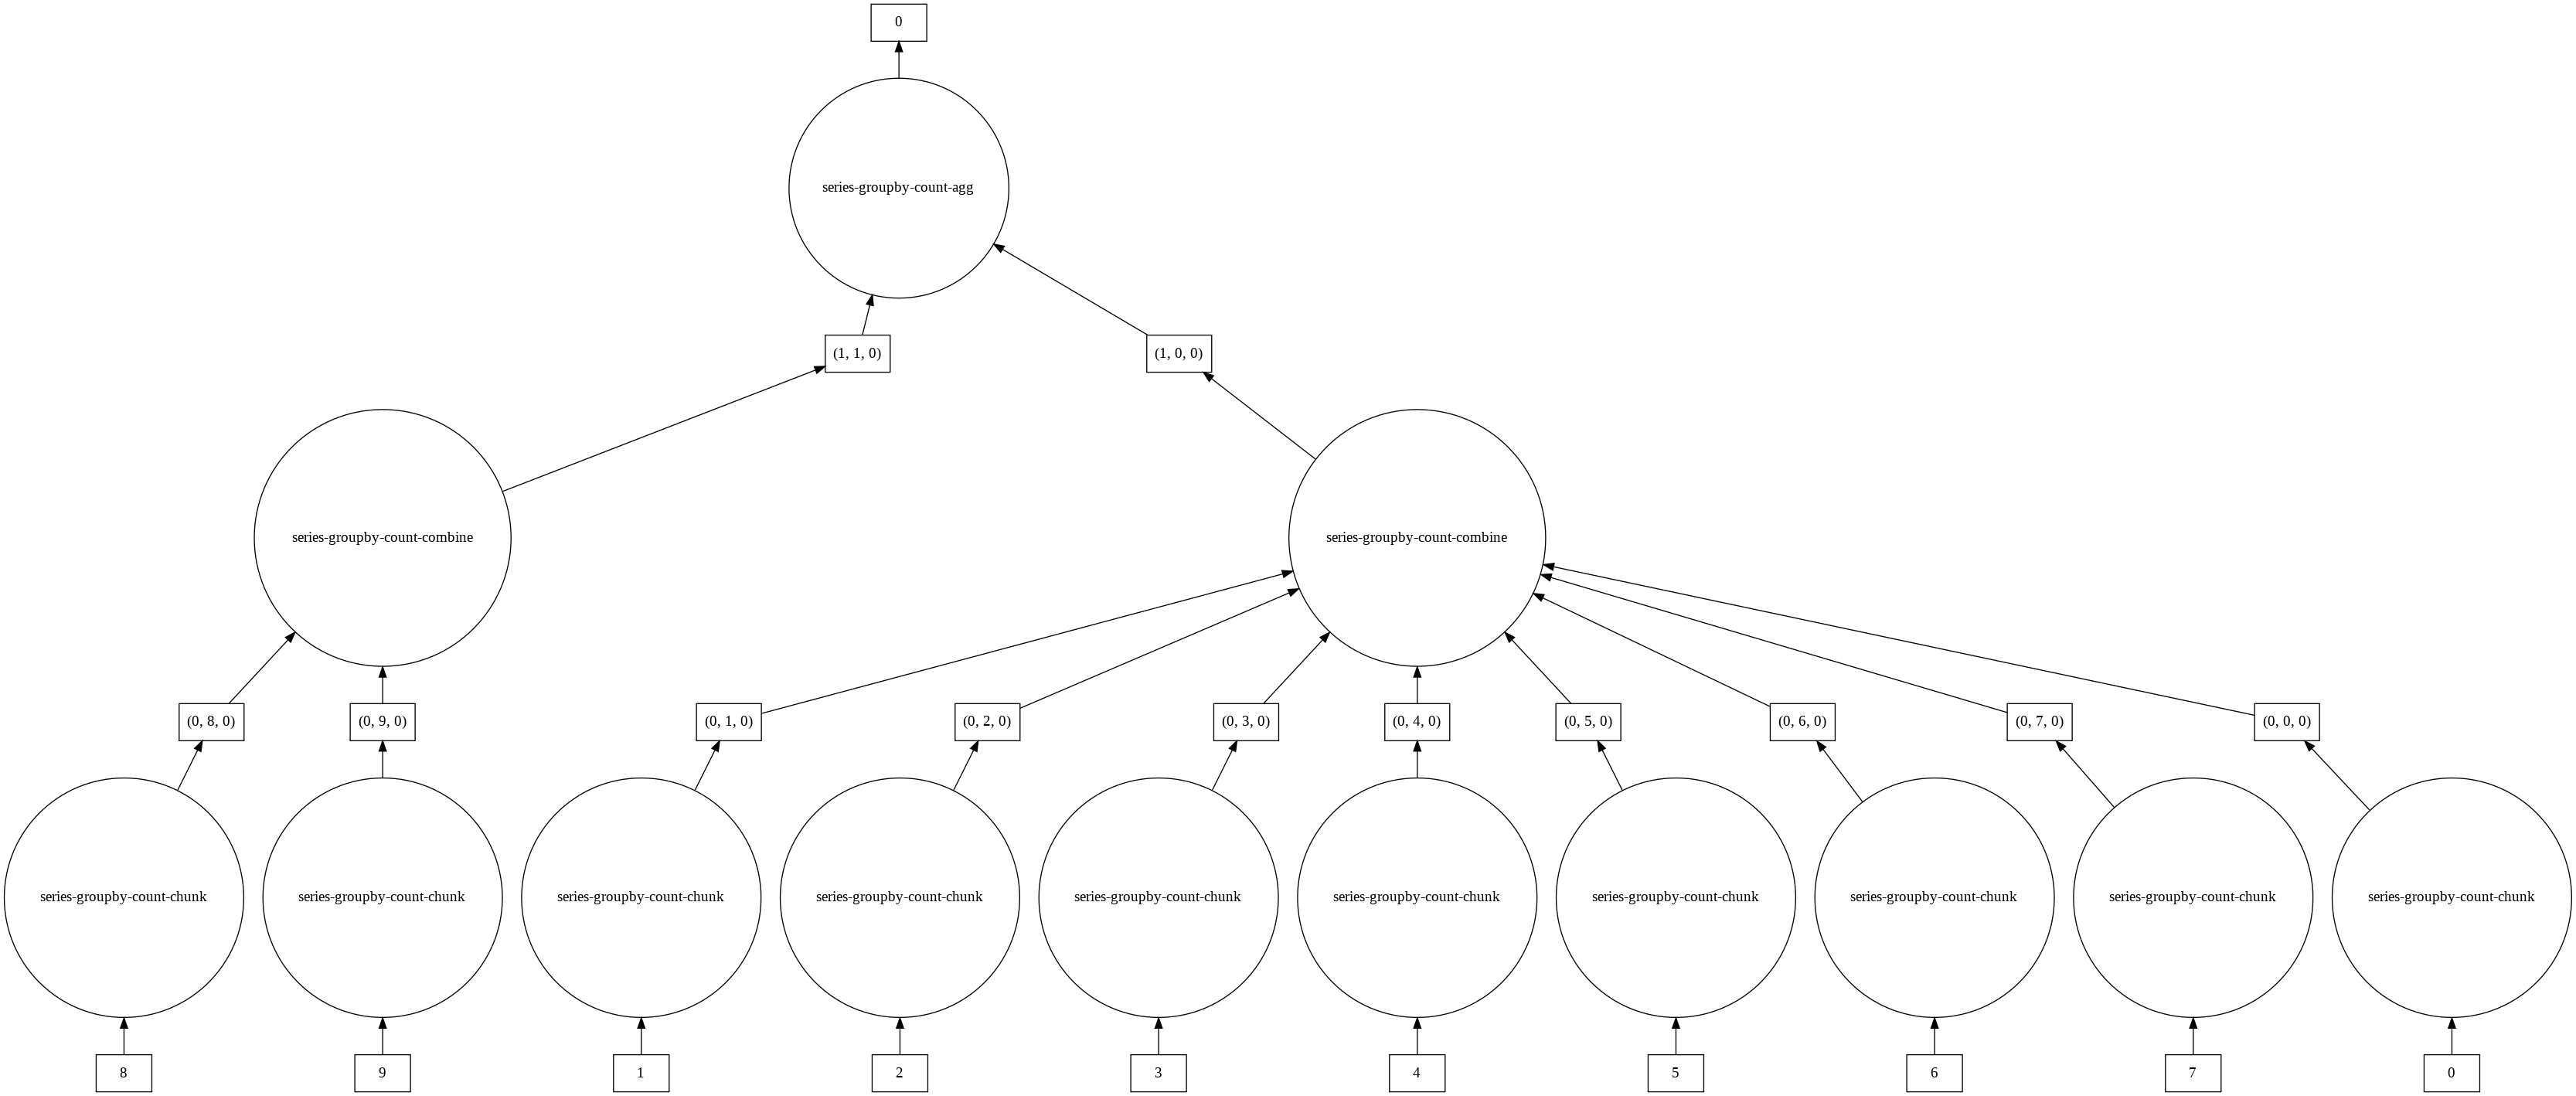

In [ ]:
#Sa se afiseze numarul de angajati pe departamente
dep=demp.groupby('dep').dep.count()
dep.visualize()

In [ ]:
%time dep.compute()

CPU times: user 34.8 ms, sys: 5.16 ms, total: 40 ms
Wall time: 39.2 ms


dep
d001     6880
d002     6593
d003     5737
d004    28099
d005    29587
d006     5226
d007    17513
d008     5279
d009     5529
Name: dep, dtype: int64

CPU times: user 12.2 ms, sys: 1.23 ms, total: 13.4 ms
Wall time: 15.3 ms
CPU times: user 198 µs, sys: 0 ns, total: 198 µs
Wall time: 165 µs


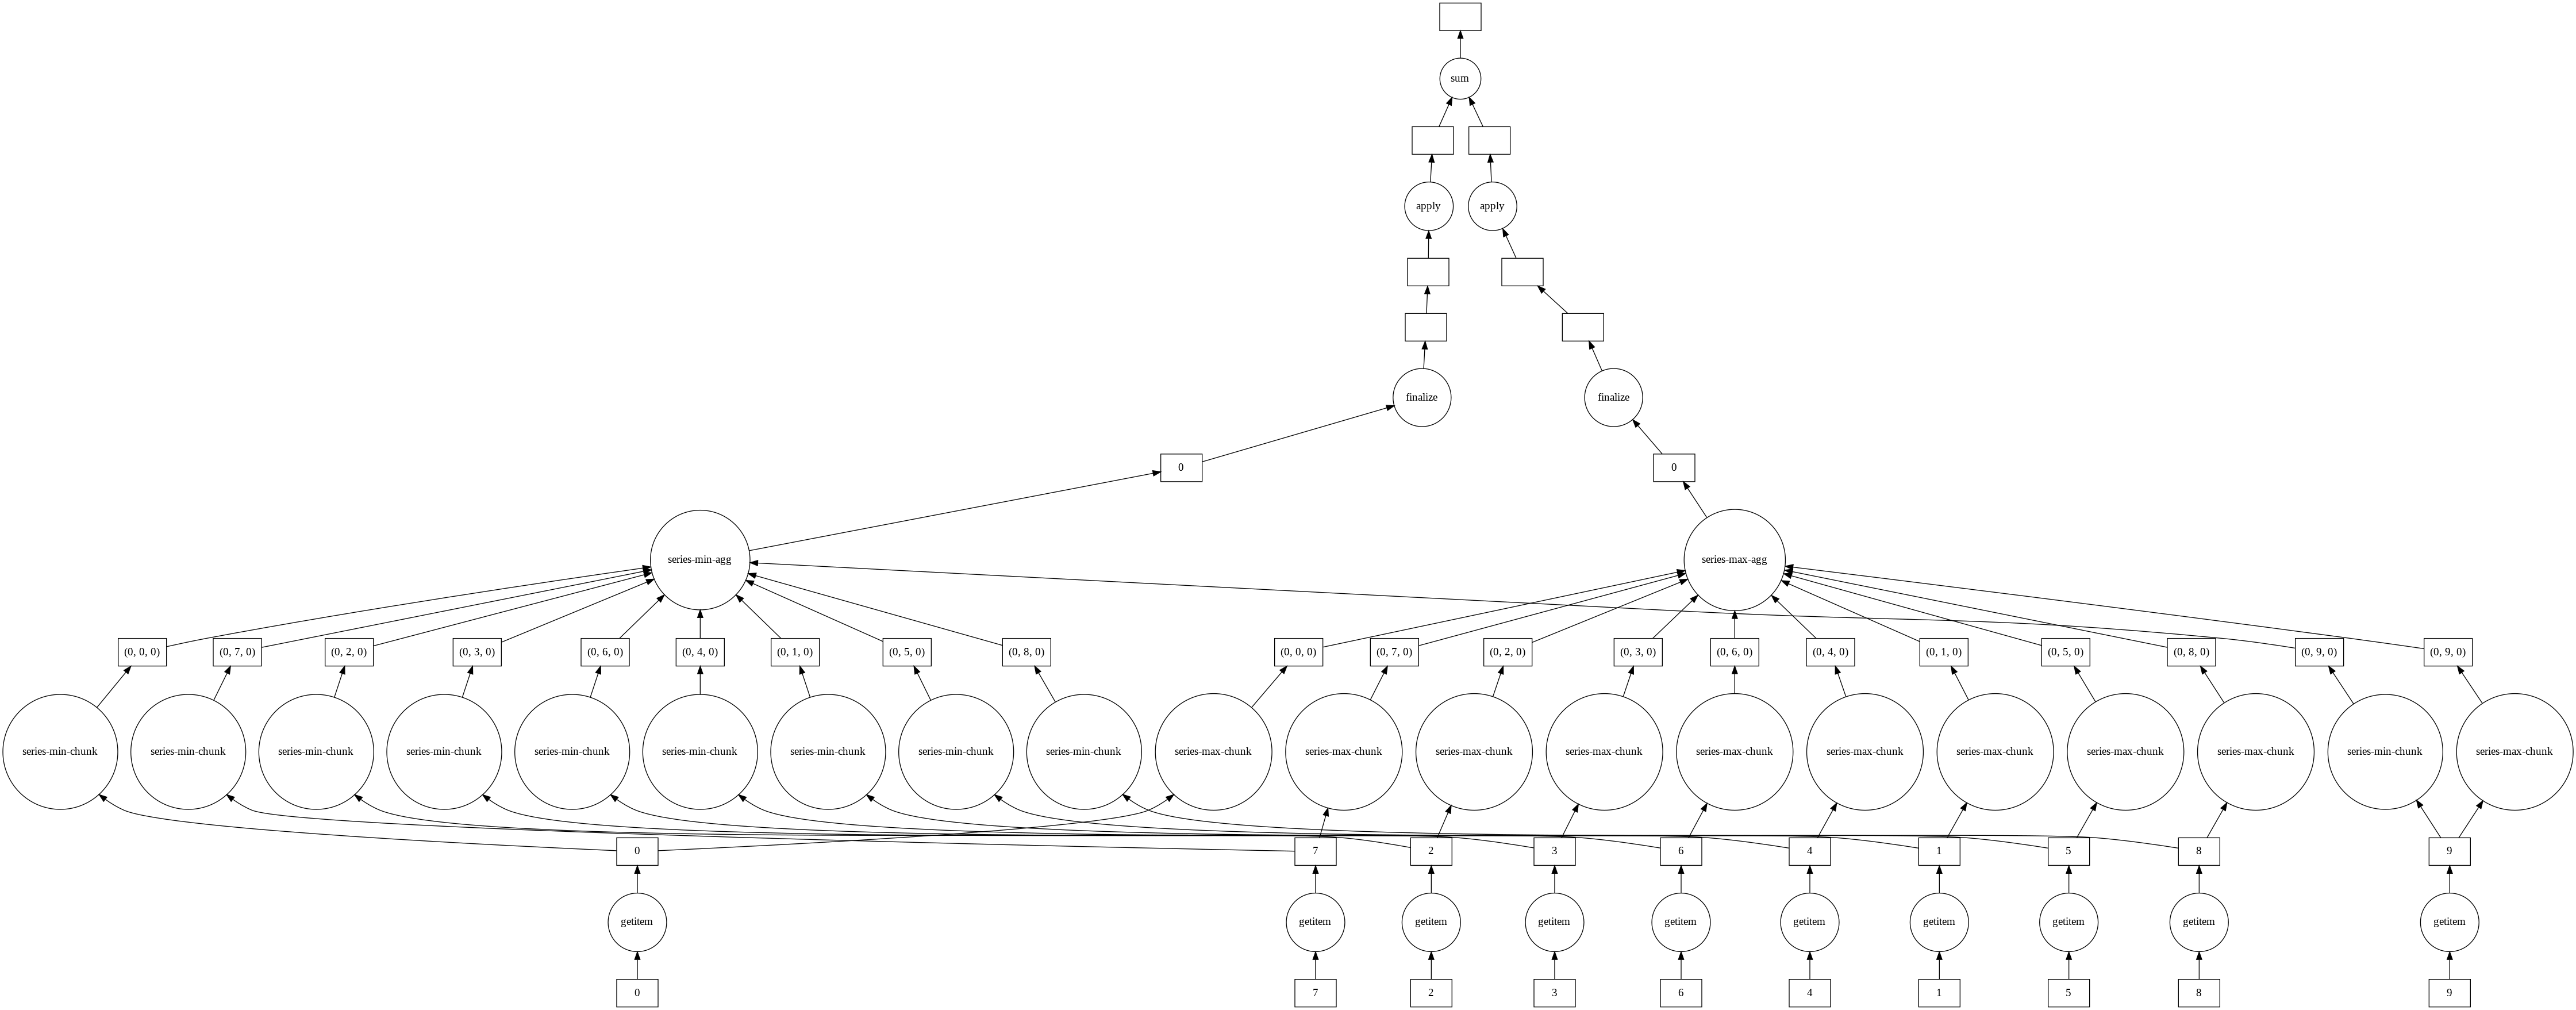

In [ ]:
#Sa se afiseze salariul minim sinsalariul maxim
%time np.array(dask.compute(demp['salary'].min(), demp['salary'].max())).sum()

x = delayed(demp['salary'].min())(1)
y = delayed(demp['salary'].max())(2)
%time z = delayed(sum)(x,y)
z.visualize()